# Løsning av differensialligninger (mikaebo og jaceks)

### Fjerde ordens Runge-Kutta metoden for enkel harmonisk pendel
### TFY4163 Bølgefysikk og fluidmekanikk - Prosjekt

### Innledning og teori
Bevegelsesligningen for en pendel med friksjon og drivkraft er

\begin{equation} \frac{d^2θ}{dt^2} + \frac{g}{l}sinθ + q\frac{dθ}{dt} = \frac{F_D}{ml}sin(\omega_Dt), \end{equation} 
    
hvor θ er pendelens utslagsvinkel, g er tyngdeakselerasjonen, l er lengden av snora pendelen er festet i, q er en friksjonsparameter, $\frac{F_D}{ml}$ er drivkraften som pendelen utsettes
for, og $\omega_D$ er drivkraftens vinkelfrekvens. Vi definerer $ω_0 =\sqrt{g/l}$, som er pendelens vinkelfrekvens.

Anta at sin θ ≈ θ i alle deloppgavene (dersom ikke annet blir oppgitt), slik at bevegelesesligningen du skal løse er gitt ved

\begin{equation} \frac{d^2θ}{dt^2} + \frac{g}{l}θ + q\frac{dθ}{dt} = \frac{F_D}{ml}sin(\omega_Dt), \end{equation} 
Benytt parametrene under når du løser ligningen:

• Lengden av snora, $l = 1.0 m$

• Tyngeakselerasjonen, $g = 9.8 m/s^2$

• Initiell vinkel med hensyn til vertikalen, $θ_0 = 0.2 rad$

• Initiell vinkelhastighet, $ω_0 = 0.0 rad/s$

• Friksjonsparameter, $q = 1.0 s^{-1}$

• Drivkraftens vinkelfrekvens, $ω_D = 3.13 s^{−1}$

• Drivkraft, $\frac{F_D}{ml} = 0.2 N$

Når drivfrekvensen, $ω_D$ er nær pendelens vinkelfrekvens, $ω_0 =\sqrt{g/l}$, får vi resonans, som vi skal undersøke i oppgavene under.

## Oppgave 1

Bruk fjerdeordens Runge-Kutta metoden for å løse bevegelsesligningen. Plot vinkelutslaget som funksjon av tid, opp til t = 20 s. Bruk tidssteg ∆t = 0.01 s.

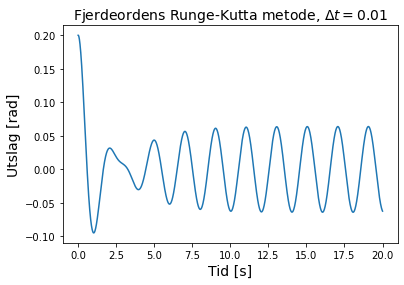

In [1]:
import numpy as np               
import matplotlib.pyplot as plt   
from numpy import pi 

%matplotlib inline

######## Functions ########
def k(theta, w, t):
    return impetus*np.sin(w_D*t) - (q*w) - ((g/l)*theta)

def f(w):
    return w

def RK4_step(k, f, theta, w, dt, t):
   
    k1 = k(theta, w, t)
    f1 = f(w)
    k2 = k(theta + (dt/2)*f1, w, t)
    f2 = f(w + (dt/2)*k1)
    k3 = k(theta + (dt/2)*f2, w, t)
    f3 = f(w + (dt/2)*k2)
    k4 = k(theta + dt*f3, w, t)
    f4 = f(w + dt*k3)
    
    return theta + (dt/6)*(f1 + (2*f2) + (2*f3) + f4), w + (dt/6)*(k1 + (2*k2) + (2*k3) + k4)

def RK4_method(k, f, theta_0, w_0, dt, T):

    n = int(T/dt)
    
    theta = np.zeros(n+1)
    w = np.zeros(n+1)
    t = np.linspace(0, T, n + 1)
    
    theta[0] = theta_0
    w[0] = w_0
    
    for i in range(n):
        theta[i+1], w[i+1] = RK4_step(k, f, theta[i], w[i], dt, t[i])

    return theta, w, t

######## Parameters ######## 
l = 1.0         
g = 9.8  
impetus = 0.2 # actually F_d/(m*l) (drivkraft)
w_D = 3.13
q = 1

theta_0 = 0.2   
w_0 = 0.0 

dt = 0.01
T = 20

######## Plotting ########
theta, w, t = RK4_method(k, f, theta_0, w_0, dt, T)  

plt.figure(0)
plt.plot(t, theta)
plt.title('Fjerdeordens Runge-Kutta metode, $Δt = 0.01$', fontsize=14)
plt.xlabel('Tid [s]', fontsize=14)
plt.ylabel('Utslag [rad]', fontsize=14)
plt.show()

## Oppgave 2

Finn en passende steglengde, ∆t, ved å utføre konvergenstest av løsningen, ved fjerde
ordens Runge-Kutta metoden. Utfør også testen for Euler-Cromer metoden (som du
må implementere i koden din). Plot de to konvergenstestene i hver sin figur. Vurder
ut fra konvergenstesten om tidssteget brukt i oppgave 1 var tilstrekkelig.

<Figure size 432x288 with 0 Axes>

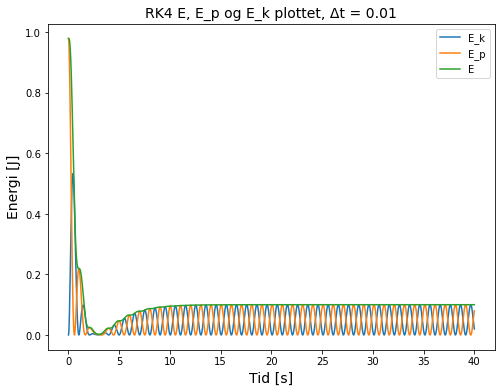

<Figure size 432x288 with 0 Axes>

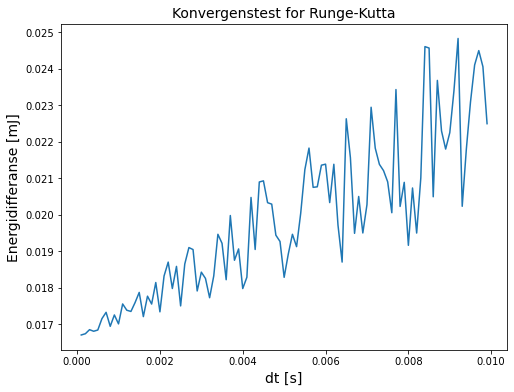

<Figure size 432x288 with 0 Axes>

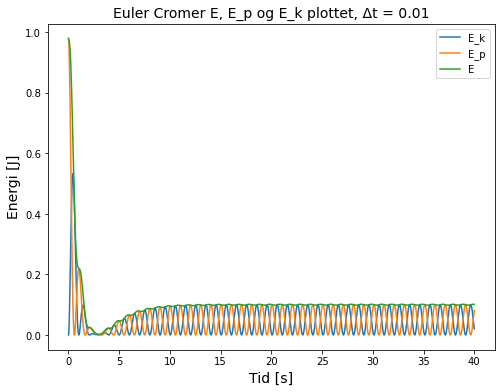

<Figure size 432x288 with 0 Axes>

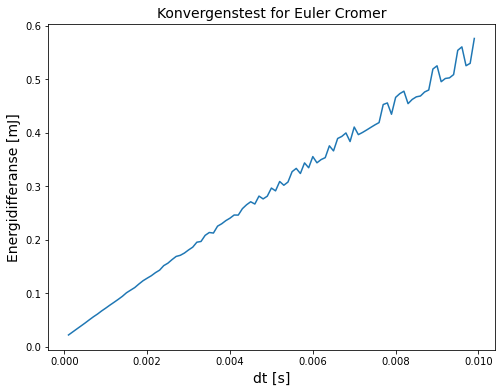

In [8]:
######## Functions ########
def euler_cromer_approx(theta_0, w_0, dt, T):
  
    n = int(T/dt)
    
    theta = np.zeros(n+1)
    w = np.zeros(n+1)
    t = np.linspace(0, T, n+1)
    
    theta[0] = theta_0
    w[0] = w_0
    
    for i in range(n):
        w[i+1] = w[i] + impetus*np.sin(w_D*t[i])*dt - (q*w[i])*dt - ((g/l)*theta[i])*dt
        theta[i+1] = theta[i] + w[i+1]*dt
    return theta, w, t

######## Parameters ########
l = 1.0         
g = 9.8  
impetus = 0.2
w_D = 3.13
q = 1
m = 5 # as mass is not given, we choose some arbitrary value

theta_0 = 0.2   
w_0 = 0.0 

dt = 0.01
T = 40 # the bigger value of T here gives a better / more reaslistic result

dt = np.arange(0.0001, 0.01, 0.0001)
diff_cromer = np.zeros(len(dt))
diff_RK4 = np.zeros(len(dt))  

########### Opperations ###########
######## Convergence tests ########
for i in range(len(dt)):
    
    theta, w, t = euler_cromer_approx(theta_0, w_0, dt[i], T)
    
    E = ((1/2)*m*l**2*w**2 + (1/2)*m*g*l*theta**2)
    index_when_t_is_20 = int(20/dt[i]) # through observation of figure 1 and 3, for some arbitrary dt, resonance amplitute for the function (with the current variables) is reached a little earlier than t=20
    diff_cromer[i] = abs(E[-1] - E[index_when_t_is_20])

for i in range(len(dt)):

    theta, w, t = RK4_method(k, f, theta_0, w_0, dt[i], T)
    
    E = ((1/2)*m*l**2*w**2 + (1/2)*m*g*l*theta**2)
    index_when_t_is_20 = int(20/dt[i])
    diff_RK4[i] = abs(E[-1] - E[index_when_t_is_20])

######## Energy ########

theta, w, t = RK4_method(k, f, theta_0, w_0, 0.01, T) 

E_k_RK4 = (1/2)*m*l**2*w**2
E_p_RK4 = (1/2)*m*g*l*theta**2

theta, w, t = euler_cromer_approx(theta_0, w_0, 0.01, T) 

E_k_crom = (1/2)*m*l**2*w**2
E_p_crom = (1/2)*m*g*l*theta**2

######## Plotting ########
plt.figure(1)
plt.figure(figsize=(8,6))
plt.plot(t, E_k_RK4, label="E_k")
plt.plot(t, E_p_RK4, label="E_p")
plt.plot(t, (E_k_RK4 + E_p_RK4), label="E")
plt.title('RK4 E, E_p og E_k plottet, Δt = 0.01', fontsize=14)
plt.xlabel('Tid [s]', fontsize=14)
plt.ylabel('Energi [J]', fontsize=14)
plt.legend()
plt.show()

plt.figure(2)
plt.figure(figsize=(8,6))
plt.plot(dt, diff_RK4*(10**3))
plt.title('Konvergenstest for Runge-Kutta', fontsize=14)
plt.xlabel('dt [s]', fontsize=14)
plt.ylabel('Energidifferanse [mJ]', fontsize=14)
plt.show()

plt.figure(3)
plt.figure(figsize=(8,6))
plt.plot(t, E_k_crom, label="E_k")
plt.plot(t, E_p_crom, label="E_p")
plt.plot(t, (E_k_crom + E_p_crom), label="E")
plt.title('Euler Cromer E, E_p og E_k plottet, Δt = 0.01', fontsize=14)
plt.xlabel('Tid [s]', fontsize=14)
plt.ylabel('Energi [J]', fontsize=14)
plt.legend()
plt.show()
    
plt.figure(4)
plt.figure(figsize=(8,6))
plt.plot(dt, diff_cromer*(10**3))
plt.title('Konvergenstest for Euler Cromer', fontsize=14)
plt.xlabel('dt [s]', fontsize=14)
plt.ylabel('Energidifferanse [mJ]', fontsize=14)
plt.show()

#### Av konvergenstestene ser vi at lavere $dt$ verdier vil gi mere nøyaktige utregninger, dermed vil $dt = 0.001$ brukes videre. Men om $dt = 0.01$ har vært tillstrekkelig nok for oppgave 1, virker som et arbitrært spørsmål. Tiden å kalkulere med $dt = 0.001$ i motsetning til $dt = 0.01$ tar ca. 10 ganger lengre tid (i og med at alle arrayene blir 10 ganger større), men er ser ut til å være (i beste fall) 1.5 "ganger" mer nøyaktig (med en differanse på $0.8*10^{-5}$). Men for vår hensikt (hvor vi ikke trenger å bekymre oss hvor lang tid en utregning tar), er $dt < 0.01$ hensiktsmessig. 

## Oppgave 3

Undersøk hvordan resonantamplituden avhenger av drivfrekvensen $Ω_D$. Plot vinkelutslaget for minst fem ulike verdier av $Ω_D$, som du mener viser denne sammenhengen.

<Figure size 432x288 with 0 Axes>

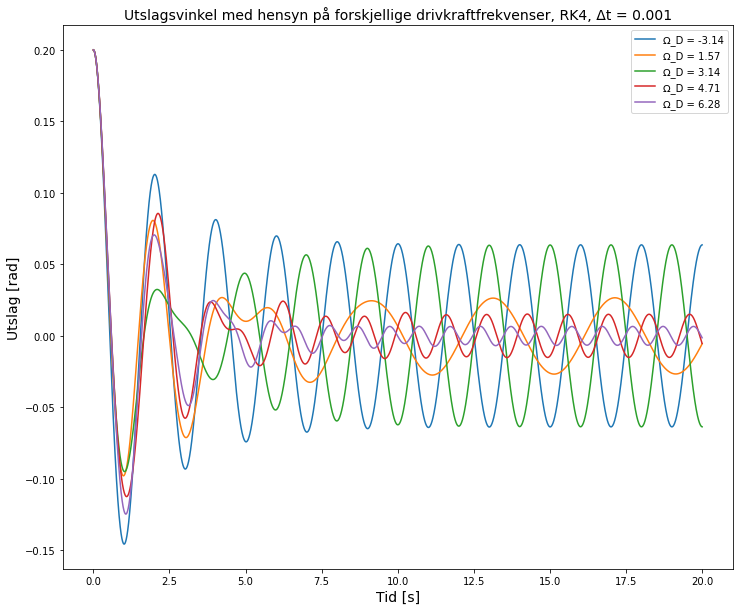

In [9]:
######## Parameters ########
l = 1.0         
g = 9.8  
impetus = 0.2
w_D_list = [-pi, pi/2, pi, 3*pi/2, 2*pi] # the 5 chosen values of w_D. Why these values where chosen are explained in the next cell
q = 1

theta_0 = 0.2   
w_0 = 0.0 

dt = 0.001
T = 20

######## Plotting ########
plt.figure(5)
plt.figure(figsize=(12,10))
for w_D in w_D_list:
    plt.plot(RK4_method(k, f, theta_0, w_0, dt, T)[2], RK4_method(k, f, theta_0, w_0, dt, T) [0], label="Ω_D = {0:.2f}".format(w_D))
plt.title('Utslagsvinkel med hensyn på forskjellige drivkraftfrekvenser, RK4, Δt = 0.001', fontsize=14)
plt.xlabel('Tid [s]', fontsize=14)
plt.ylabel('Utslag [rad]', fontsize=14)
plt.legend()
plt.show()

#### Høyresiden av bevegelsesligningen ($\frac{F_D}{ml}sin(\omega_Dt)$), vil ha negativt fortegn for negative $\omega_D$ som konsekvens av sinusfunksjonen. Dermed vil drivkraften enten "støtte" eller "motgå" bevegelsen av pendelen, før den når resonans, angående om $\omega_D$ er negativ eller positiv. Men for samme absoluttverdier av $\omega_D$ vil resonansamplituden være det samme, bare i en forskjøvet fase. 
#### Ellers: Som konsekvens av formelen ($\frac{d^2θ}{dt^2} + \frac{g}{l}θ + q\frac{dθ}{dt} = \frac{F_D}{ml}sin(\omega_Dt)$), vil amplituden være høyest (relativt omløp) for hver $\pi +2\pi k$ , $k ∈ ℤ$, og lavest (relativt omløp) for hver $2\pi k$ , $k ∈ ℤ$. Ellers vil amplituden svinge mellom dette maxima og minimaet. Dermed de valgte verdiene.

## Oppgave 4

Undersøk hvordan resonantamplituden avhenger av friksjonsparameteren, $q$. Plot
vinkelutslaget for minst fem ulike verdier av $q$, som du mener viser denne sammenhengen.

<Figure size 432x288 with 0 Axes>

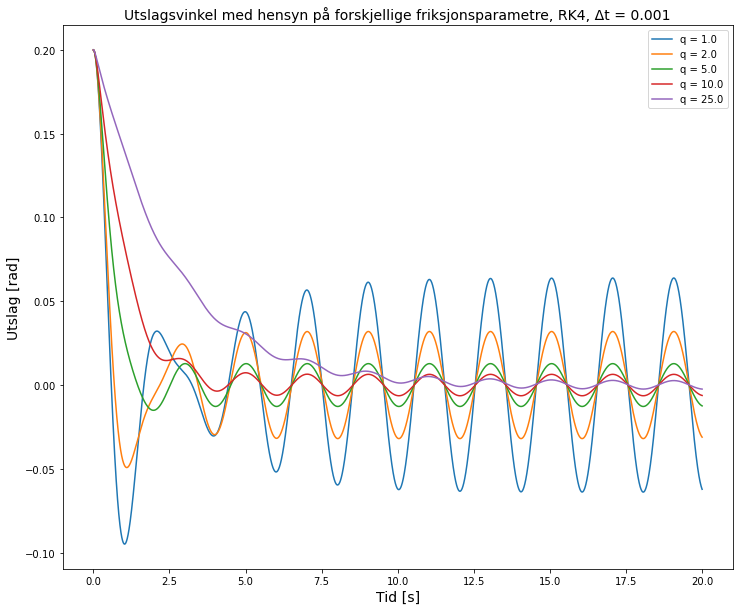

In [10]:
######## Parameters ######## 
l = 1.0         
g = 9.8  
impetus = 0.2
w_D = 3.13
q_list = [1, 2, 5, 10, 25] # the 5 chosen values of q. Why these values where chosen are explained in the next cell

theta_0 = 0.2   
w_0 = 0.0 

dt = 0.001
T = 20

######## Plotting ########
plt.figure(6)
plt.figure(figsize=(12,10))
for q in q_list:
    plt.plot(RK4_method(k, f, theta_0, w_0, dt, T)[2], RK4_method(k, f, theta_0, w_0, dt, T)[0], label="q = {0:.1f}".format(q))
plt.title('Utslagsvinkel med hensyn på forskjellige friksjonsparametre, RK4, Δt = 0.001', fontsize=14)
plt.xlabel('Tid [s]', fontsize=14)
plt.ylabel('Utslag [rad]', fontsize=14)
plt.legend()
plt.show()

#### Friksjonsparametern $q$ virker som en motkraft til systemet, og dermed vil nå "balanse" med drivkraften avhengig av hva $q$ er. Altså resonansamplituden avhenger av $q$, der høyere $q$ gir lavere resonansamplitude. De valgte verdiene av $q$ er der for å demonstrere dette. 

## Oppgave 5

For en dempet pendel uten drivkraft (sett $F_D = 0$) skiller vi mellom overkritisk,
underkritisk og kritisk dempning. Plot vinkelutslaget opp til $t = 4 s$, og bestem for
hvilke $q$ vi finner disser regimene.

<Figure size 432x288 with 0 Axes>

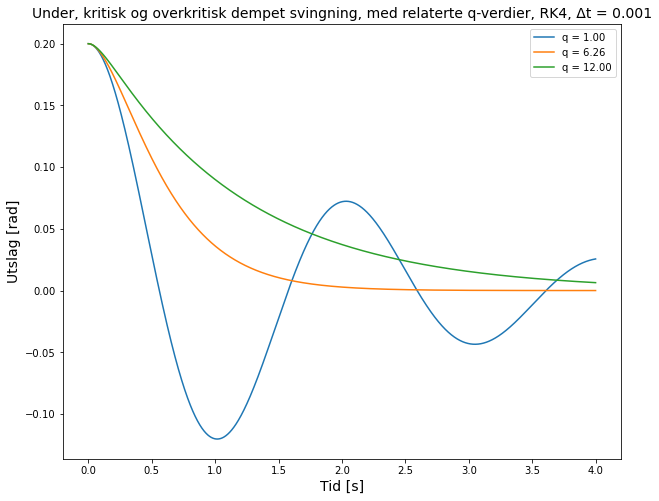

In [11]:
######## Parameters ######## 
l = 1.0         
g = 9.8  
impetus = 0.0 # F_d = 0 => F_D/(m*l) = 0
w_D = 3.13
q_list = [1, 6.264, 12] # the reason for these chosen values are explained in the next cell

theta_0 = 0.2   
w_0 = 0.0 

dt = 0.001
T = 4

######## Plotting ########
plt.figure(7)
plt.figure(figsize=(10,8))
for q in q_list:
    plt.plot(RK4_method(k, f, theta_0, w_0, dt, T)[2], RK4_method(k, f, theta_0, w_0, dt, T)[0], label="q = {0:.2f}".format(q))
plt.title('Under, kritisk og overkritisk dempet svingning, med relaterte q-verdier, RK4, Δt = 0.001', fontsize=14)
plt.xlabel('Tid [s]', fontsize=14)
plt.ylabel('Utslag [rad]', fontsize=14)
plt.legend()
plt.show()

#### I tilfellet hvor $F_D = 0$, får vi bevegelsesligningen: 
#### \begin{equation} \frac{d^2θ}{dt^2} + \frac{g}{l}θ + q\frac{dθ}{dt} = 0 \end{equation} som kan skrives om til:
#### \begin{equation} \frac{d^2θ}{dt^2} + 2γ\frac{dθ}{dt} + \omega_0^2θ = 0 \end{equation}
#### Vi kjenner til når en slik bevegelsesligning vil gi oss Underkritisk, kritisk og overkritisk dempning. Vi har kritisk dempning ved:
#### \begin{equation} γ = \sqrt{\omega_0^2} , q = 2γ => γ =  \frac{q}{2}, \omega_0^2 = \frac{g}{l} : q = 2\sqrt{\frac{g}{l}} ≈ 6.264 \end{equation} ellers:
#### Underkritisk ved: $γ < \omega_0 => q < 6.264$
#### Overkritisk ved: $γ > \omega_0 => q > 6.264$

## Oppgave 6 (Ekstra oppgave)

a) Gå nå bort fra antakelsen at $sin$ $θ ≈ θ$. Plot vinkelutslaget som funksjon av tid, i
samme plot som vinkelutslaget for liten-vinkel tilærmelsen for $θ_0 = 60^◦$ og $ω_0 = 0.0$.
Bruk tiddssteg $∆t = 0.01$, og samme parametre som i oppgave 1. Tips: Konverter
fra grader til radianer med ‘np.radians‘.

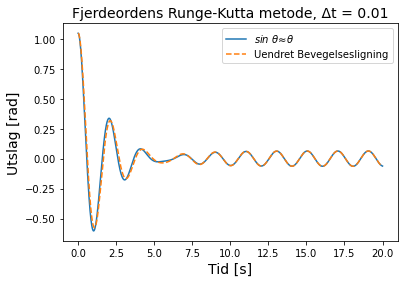

In [12]:
######## Functions ######## 
def k_sin(theta, w, t):
    return impetus*np.sin(w_D*t) - (q*w) - ((g/l)*np.sin(theta))

def f_sin(w):
    return w

def RK4_step_sin(k, f, theta, w, dt, t):
   
    k1 = k_sin(theta, w, t)
    f1 = f_sin(w)
    k2 = k_sin(theta + (dt/2)*f1, w, t)
    f2 = f_sin(w + (dt/2)*k1)
    k3 = k_sin(theta + (dt/2)*f2, w, t)
    f3 = f_sin(w + (dt/2)*k2)
    k4 = k_sin(theta + dt*f3, w, t)
    f4 = f_sin(w + dt*k3)
    
    return theta + (dt/6)*(f1 + (2*f2) + (2*f3) + f4), w + (dt/6)*(k1 + (2*k2) + (2*k3) + k4)

def RK4_method_sin(k_sin, f_sin, theta_0, w_0, dt, T):

    n = int(T/dt)
    
    theta = np.zeros(n+1)
    w = np.zeros(n+1)
    t = np.linspace(0, T, n + 1)
    
    theta[0] = theta_0
    w[0] = w_0
    
    for i in range(n):
        theta[i+1], w[i+1] = RK4_step_sin(k_sin, f_sin, theta[i], w[i], dt, t[i])

    return theta, w, t

######## Parameters ######## 
l = 1.0         
g = 9.8  
impetus = 0.2
w_D = 3.13
q = 1

theta_0 = np.radians(60) # converts 60 degrees to radians   
w_0 = 0.0 

dt = 0.01
T = 20

######## Plotting ########
theta, w, t = RK4_method(k, f, theta_0, w_0, dt, T)  
theta_sin, w_sin, t_sin = RK4_method_sin(k_sin, f_sin, theta_0, w_0, dt, T)

plt.figure(9)
plt.plot(t, theta, label="$sin$ $θ ≈ θ$")
plt.plot(t_sin, theta_sin, '--', label="Uendret Bevegelsesligning")
plt.title('Fjerdeordens Runge-Kutta metode, Δt = 0.01', fontsize=14)
plt.xlabel('Tid [s]', fontsize=14)
plt.ylabel('Utslag [rad]', fontsize=14)
plt.legend()
plt.show()

b) Prøv deg frem med initialverdiene og parametrene, og finn når kaotisk oppførsel
begynner å oppstå. Plot vinkelutslaget som funksjon av tid for slik kaotisk oppførsel.

<Figure size 432x288 with 0 Axes>

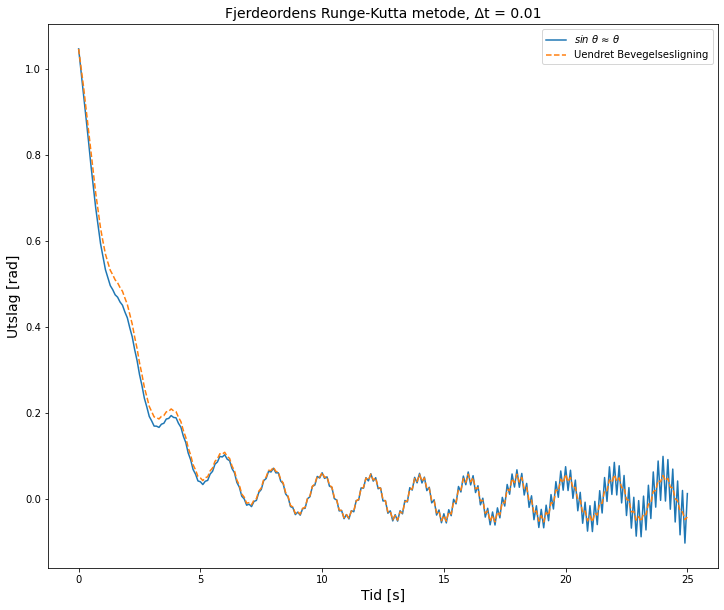

In [13]:
######## Parameters ######## 
l = 1.0         
g = 9.8  
impetus = -3
w_D = pi
q = 20

theta_0 = np.radians(60) # converts degrees to radians   
w_0 = 2.0

dt = 0.1
T = 25

######## Plotting ########
theta, w, t = RK4_method(k, f, theta_0, w_0, dt, T)  
theta_sin, w_sin, t_sin = RK4_method_sin(k_sin, f_sin, theta_0, w_0, dt, T)

plt.figure(10)
plt.figure(figsize=(12,10))
plt.plot(t, theta, label="$sin$ $θ$ $≈$ $θ$")
plt.plot(t_sin, theta_sin, "--", label="Uendret Bevegelsesligning")
plt.title('Fjerdeordens Runge-Kutta metode, Δt = 0.01', fontsize=14)
plt.xlabel('Tid [s]', fontsize=14)
plt.ylabel('Utslag [rad]', fontsize=14)
plt.legend()
plt.show()